In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("/home/deepp/rebelway/week03/train.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# clean up data

In [5]:
tmp = {"Age": np.floor(df["Age"].mean()), "Embarked": "C"}
df.fillna(value=tmp,inplace=True)
df.dropna(axis=1,inplace=True)
df.drop(["Name"], axis=1,inplace=True)
mappingSex = {"male": 0, "female": 1}
mappingEmb = {"S": 0, "C": 1, "Q": 2 }
df.replace({"Sex": mappingSex, "Embarked": mappingEmb}, inplace=True)
df["Ticket"] = df["Ticket"].str.split().str[-1]
df["Ticket"] = pd.to_numeric(df["Ticket"], errors="coerce")
df["Age"] = df["Age"].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       887 non-null    float64
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


/tmp/ipykernel_1817/978658965.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Sex": mappingSex, "Embarked": mappingEmb}, inplace=True)


In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22,1,0,21171.0,7.2500,0
1,2,1,1,1,38,1,0,17599.0,71.2833,1
2,3,1,3,1,26,0,0,3101282.0,7.9250,0
3,4,1,1,1,35,1,0,113803.0,53.1000,0
4,5,0,3,0,35,0,0,373450.0,8.0500,0
5,6,0,3,0,29,0,0,330877.0,8.4583,2
6,7,0,1,0,54,0,0,17463.0,51.8625,0
7,8,0,3,0,2,3,1,349909.0,21.0750,0
8,9,1,3,1,27,0,2,347742.0,11.1333,0
9,10,1,2,1,14,1,0,237736.0,30.0708,1


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.870000e+02,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.544332,0.523008,0.381594,2.983284e+05,32.204208,0.363636
std,257.353842,0.486592,0.836071,0.477990,13.013778,1.102743,0.806057,6.576144e+05,49.693429,0.636159
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.487900e+04,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,1.122770e+05,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,3.470820e+05,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,3.101317e+06,512.329200,2.000000


# PANDAS

# SURVIVED BY AGE

<Axes: title={'center': 'Survived by age'}, xlabel='Age', ylabel='Survived'>

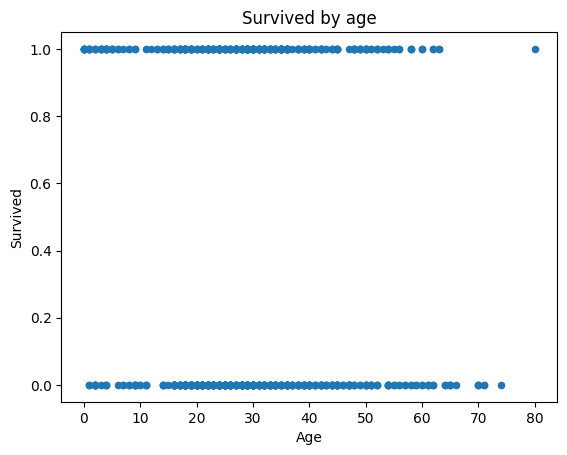

In [11]:
df.plot(x="Age", y="Survived", kind="scatter", title="Survived by age" )

# MEAN FARE BY AGE

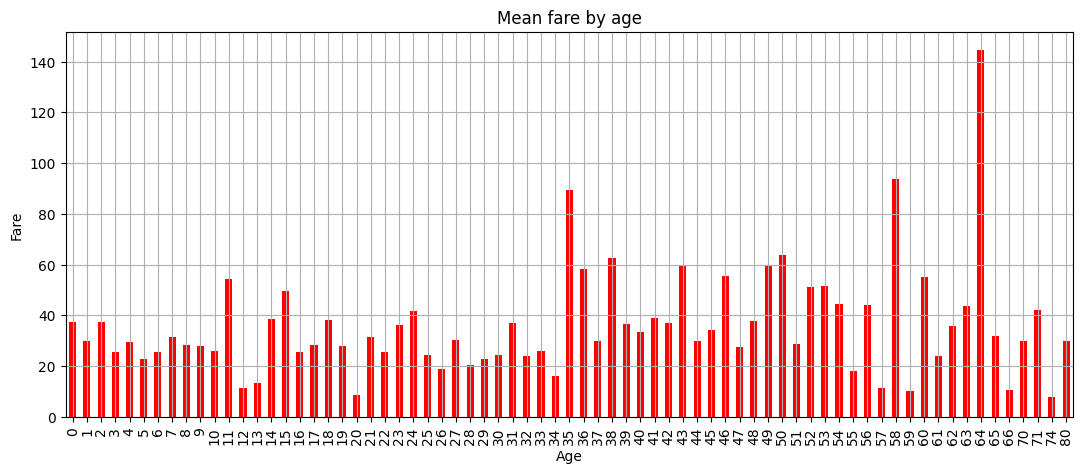

In [39]:
df.groupby("Age").mean().plot(y="Fare", kind='bar', rot=90, figsize=(13,5), grid=True, color="red", title="Mean fare by age", ylabel="Fare", legend =False);

In [126]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.870000e+02,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.560236,0.523008,0.381594,2.983284e+05,32.204208,0.363636
std,257.353842,0.486592,0.836071,0.477990,13.005010,1.102743,0.806057,6.576144e+05,49.693429,0.636159
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.487900e+04,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,1.122770e+05,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,3.470820e+05,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,3.101317e+06,512.329200,2.000000


# SURVIVED PER AGE 

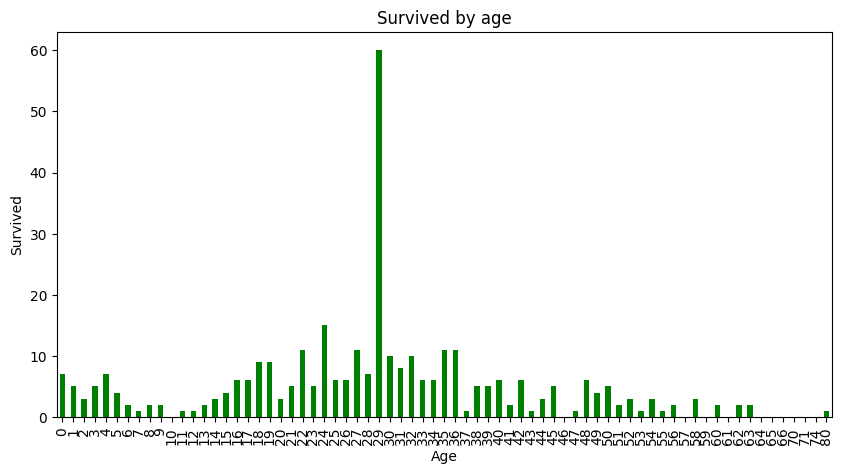

In [44]:
df.groupby("Age").sum().plot(y="Survived", kind='bar', rot=90, figsize=(10,5), color="green", title="Survived by age", ylabel="Survived", legend =False);

<Axes: title={'center': 'Survival Sex'}, ylabel='Survived'>

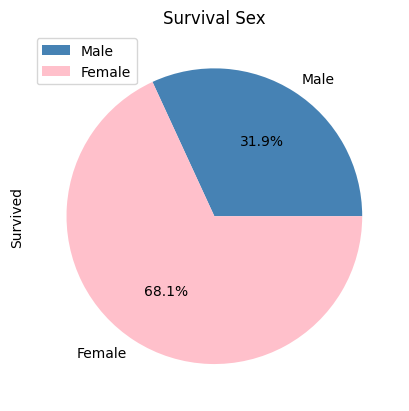

In [59]:
df.groupby("Sex").sum().plot(y="Survived", kind="pie", labels=["Male", "Female"], autopct = "%1.1f%%", title="Survival Sex", colors = ["steelblue", "pink"])

# MATPLOTLIB

# FARE PER CLASS

In [130]:
x = df["Pclass"]
y = df["Fare"]

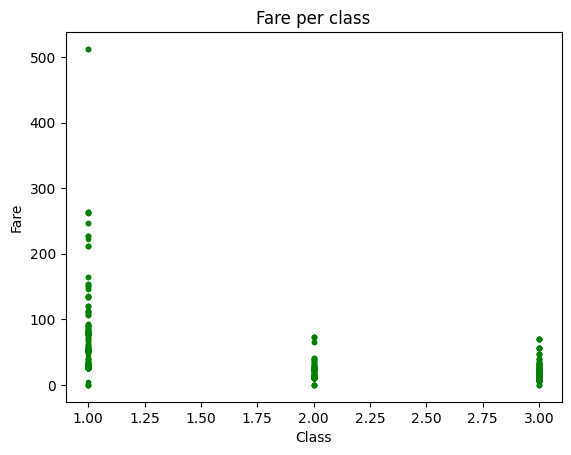

In [131]:
plt.plot(x,y,"g.")
plt.xlabel("Class")
plt.ylabel("Fare")
plt.title("Fare per class")
plt.show()

# CORRELATION BETWEEN: 
# -SEX AND FARE  
# -AGE AND FARE

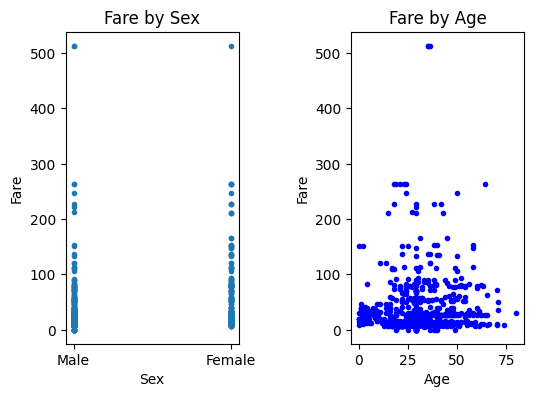

In [86]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=5.0)
x = df["Sex"]
y = df["Fare"]
plt.subplot(1,2,1)
plt.title("Fare by Sex")
#plt.xticks(x,["m","f"])
plt.xlabel("Sex")
plt.ylabel("Fare")
plt.xticks([0,1], ["Male", "Female"])
plt.plot(x,y,".")

x = df["Age"]
y = df["Fare"]
plt.subplot(1,2,2)
plt.title("Fare by Age")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.plot(x,y,"b.")
plt.show()


# AGE HISTOGRAM

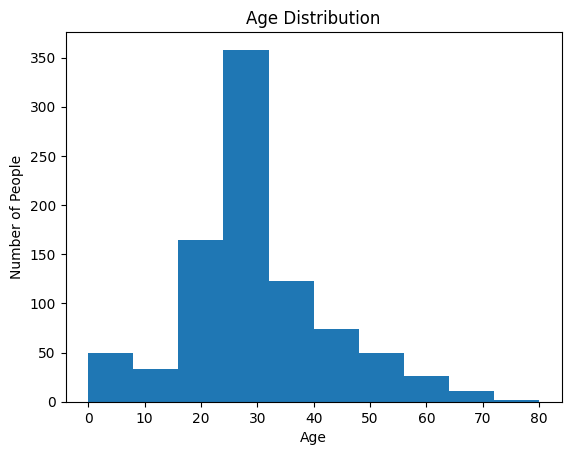

In [90]:
plt.hist(df["Age"] ) 
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.show() 

# SEABORN

In [18]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22,7.2500,0,1,0,3,2.0,0
1,2,38,71.2833,1,1,0,1,0.0,1
2,3,26,7.9250,1,0,0,3,2.0,1
3,4,35,53.1000,1,1,0,1,2.0,1
4,5,35,8.0500,0,0,0,3,2.0,0


# CORRELATION BETWEEN AGE AND FARE AND HIGHLIGHT OF SURVIVED

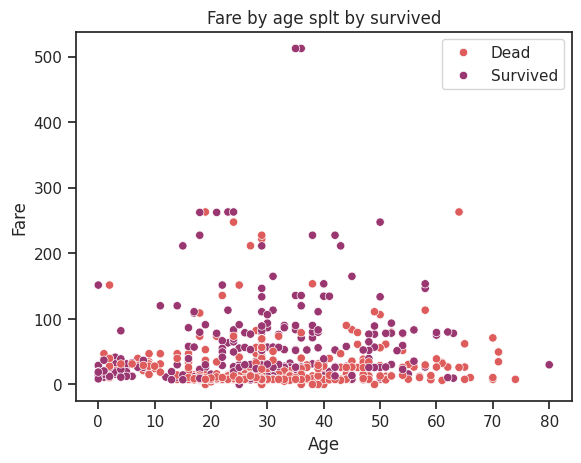

In [155]:
sns.set_theme(style="ticks")
ax = sns.scatterplot(data=df, x="Age", y="Fare", palette="flare", hue="Survived")
ax.set_title("Fare by age splt by survived")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ["Dead", "Survived"])

# FARE PER CLASS SPLIT BY SEX

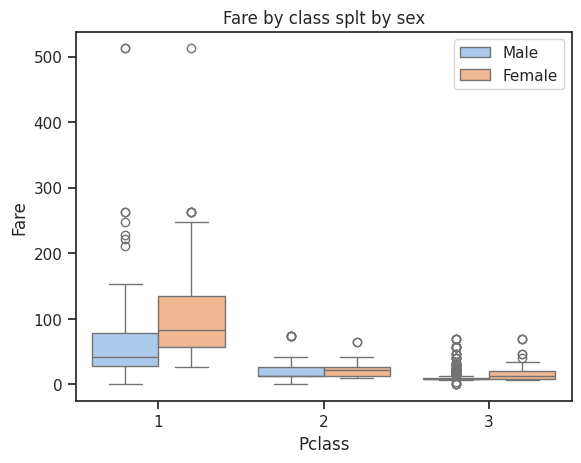

In [113]:
sns.set_theme(style="ticks")
ax = sns.boxplot(data=df, x="Pclass", y="Fare", palette="pastel", hue="Sex")
ax.set_title("Fare by class splt by sex")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ["Male", "Female"])

# AGE DISTRIBUTION SPLIT BY SEX

Text(0.5, 1.0, 'Age distribution by sex')

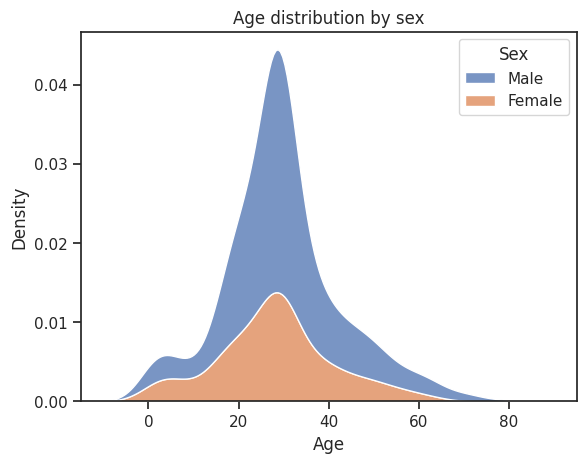

In [147]:
ax = sns.kdeplot(data=df, x="Age", hue="Sex", multiple="stack",  palette="deep")
handles = legend.legend_handles
ax.legend(handles, ["Male", "Female"],title="Sex")
ax.set_title("Age distribution by sex")

# CORRELATION BETWEEN AGE AND FARE AND HIGHLIGHT OF SURVIVED

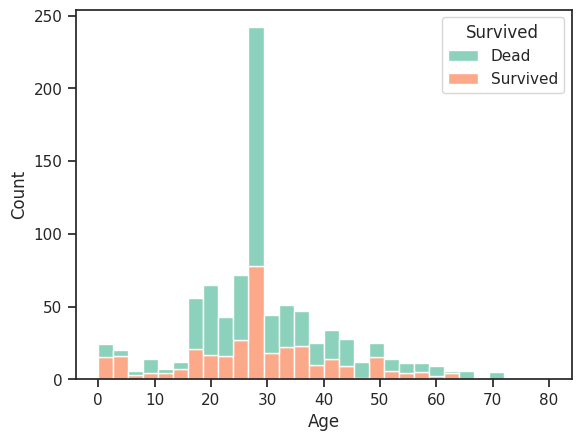

In [152]:
#ax = sns.jointplot(data=df, x="Fare", y="Age",hue="Survived", label=["Dead", "Survived"])

sns.set_theme(style="ticks")
ax = sns.histplot(data=df, x="Age", hue="Survived", multiple="stack",palette="Set2")
legend = ax.get_legend()
handles = legend.legend_handles
ax.legend(handles,["Dead", "Survived"],title="Survived")

# RELATIONAL PLOT AGE AND FARE

Text(0.5, 0.98, 'Fare by age')

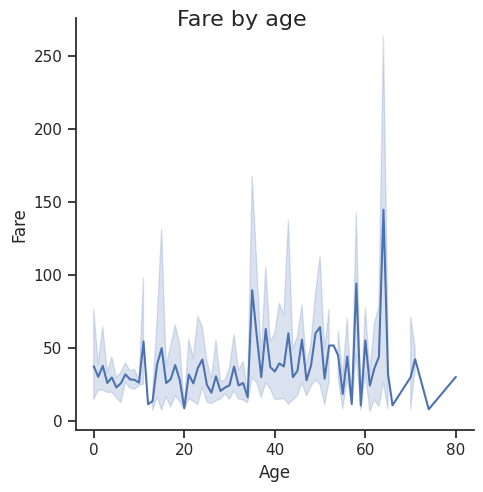

In [154]:
sns.set_theme(style="ticks")
ax = sns.relplot(data=df, x="Age", y="Fare", kind="line")
ax.fig.suptitle("Fare by age", fontsize=16)